In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import shutil
import random
import re
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score
from sklearn.preprocessing import label_binarize


print("Wersja TensorFlow:", tf.__version__)
print("Dostępne urządzenia GPU:", tf.config.list_physical_devices('GPU'))

Wersja TensorFlow: 2.18.0
Dostępne urządzenia GPU: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [3]:
# train_dir = "drive/MyDrive/content/fruits-360_original-size/fruits-360-original-size/Training"
# test_dir = "drive/MyDrive/content/fruits-360_original-size/fruits-360-original-size/Test"
# valid_dir = "drive/MyDrive/content/fruits-360_original-size/fruits-360-original-size/Validation"

train_dir = "drive/MyDrive/content/fruits_generalization_test/train"
test_dir = "drive/MyDrive/content/fruits_generalization_test/test"
valid_dir = "drive/MyDrive/content/fruits_generalization_test/val"

In [4]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = "nearest"
)

valid_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [5]:
train_generator = train_datagen.flow_from_directory(
    directory = train_dir,
    target_size = (100, 100),
    batch_size = 32,
    class_mode = "categorical"
)

valid_generator = valid_datagen.flow_from_directory(
    directory = valid_dir,
    target_size = (100, 100),
    batch_size = 32,
    class_mode = 'categorical'
)

test_generator = test_datagen.flow_from_directory(
    directory = test_dir,
    target_size = (100, 100),
    batch_size = 32,
    class_mode = 'categorical',
    shuffle = False
)

Found 2435 images belonging to 16 classes.
Found 839 images belonging to 16 classes.
Found 630 images belonging to 16 classes.


In [6]:
model = Sequential([
    Input(shape=(100,100,3)),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D((2,2)),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])

In [7]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 98, 98, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 49, 49, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 47, 47, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 23, 23, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 21, 21, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 10, 10, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12800)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,638,528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │           2,064 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,733,840 (6.61 MB)

 Trainable params: 1,733,840 (6.61 MB)

 Non-trainable params: 0 (0.00 B)

#Trenowanie modelu

In [8]:
epochs = 10
history = model.fit(
    train_generator,
    validation_data = valid_generator,
    epochs = epochs
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 1164s 15s/step - accuracy: 0.2102 - loss: 2.4266 - val_accuracy: 0.5864 - val_loss: 1.2862
Epoch 2/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 22s 283ms/step - accuracy: 0.4670 - loss: 1.4840 - val_accuracy: 0.8284 - val_loss: 0.5922
Epoch 3/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 20s 263ms/step - accuracy: 0.6319 - loss: 1.0080 - val_accuracy: 0.7211 - val_loss: 0.7971
Epoch 4/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 21s 274ms/step - accuracy: 0.6927 - loss: 0.8596 - val_accuracy: 0.8570 - val_loss: 0.4117
Epoch 5/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 20s 264ms/step - accuracy: 0.7646 - loss: 0.6469 - val_accuracy: 0.9213 - val_loss: 0.2611
Epoch 6/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 21s 273ms/step - accuracy: 0.7629 - loss: 0.6354 - val_accuracy: 0.8391 - val_loss: 0.3948
Epoch 7/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 20s 263ms/step - accuracy: 0.7896 - loss: 0.6054 - val_accuracy: 0.9547 - val_loss: 0.2022
Epoch 8/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 21s 266ms/step - accuracy: 0.8131 - loss: 0.5056 - val_accu

#Test modelu

In [9]:
test_loss, test_acc = model.evaluate(test_generator)
print(f"Wynik na zbiorze testowym – strata: {test_loss:.4f}, dokładność: {test_acc:.4f}")

20/20 ━━━━━━━━━━━━━━━━━━━━ 265s 14s/step - accuracy: 0.8348 - loss: 0.2921
Wynik na zbiorze testowym – strata: 0.2225, dokładność: 0.8873


#Zapisanie modelu na dysku

In [11]:
model.save("drive/MyDrive/content/fruits_generalization_test/fruits_model_100_30_20.keras")

In [12]:
def evaluate_model(model, test_generator):
  pred_probs = model.predict(test_generator)
  y_pred = np.argmax(pred_probs, axis=1)
  y_true = test_generator.classes

  cm = confusion_matrix(y_true, y_pred)
  print("Confusion matrix:\n", cm)

  class_labels = list(test_generator.class_indices.keys())
  print("Classification report:\n", classification_report(y_true, y_pred, target_names=class_labels))

  y_true_bin = label_binarize(y_true, classes=range(len(class_labels)))
  roc_auc = roc_auc_score(y_true_bin, pred_probs, average='macro', multi_class='ovr')
  print(f"ROC AUC (macro-average): {roc_auc:.4f}")

  plt.figure(figsize=(10, 8))
  sns.heatmap(cm, cmap="Blues", fmt='d', cbar=False)
  plt.title("Confusion Matrix")
  plt.xlabel("Predicted")
  plt.ylabel("True")
  plt.show()


20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 137ms/step
Confusion matrix:
 [[134   0   0   0   0   0   0   2   1   0   0  41   0   0   0   0]
 [  4  16   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0  20   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0  71   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0  40   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0  20   0   0   0   0   0   0   0   0   0   0]
 [  7   0   0   0   0   0  13   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  15   5   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  20   0   0   0   0   0   0   0]
 [  1   0   0   0   0   0   0   0   0  66   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  20   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  38   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  20   0   0   0]
 [  0   0   0   0  10   0   0   0   0   0   0   0   0  26   0   0]
 [

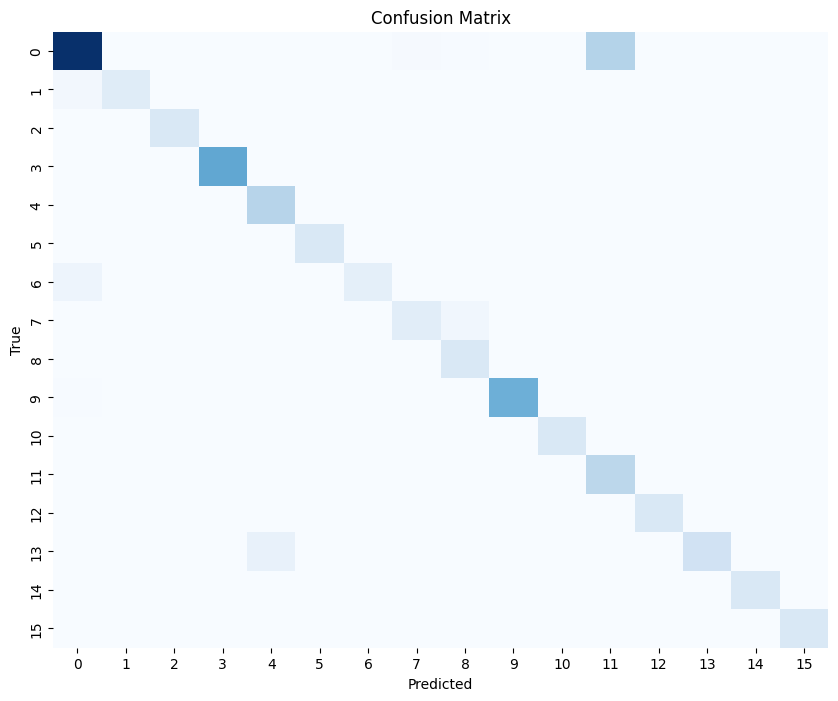

In [13]:
evaluate_model(model, test_generator)